In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


df = pd.read_csv("C:/Users/hasna/OneDrive/Desktop/python/datasheets/heart-disease.csv")
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

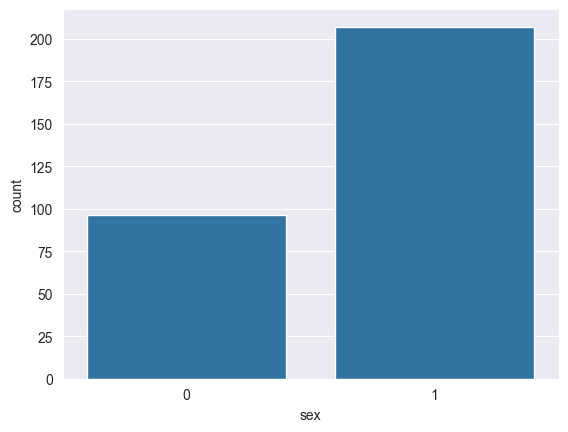

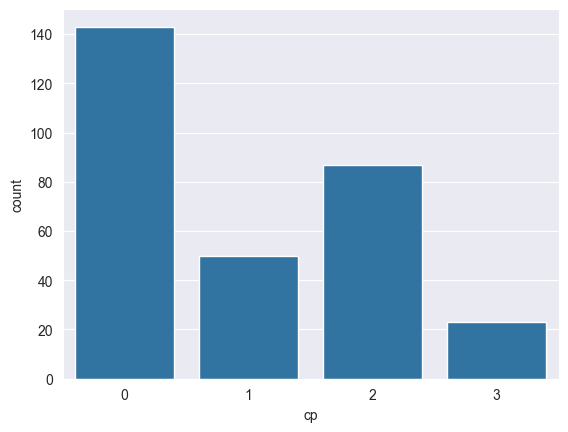

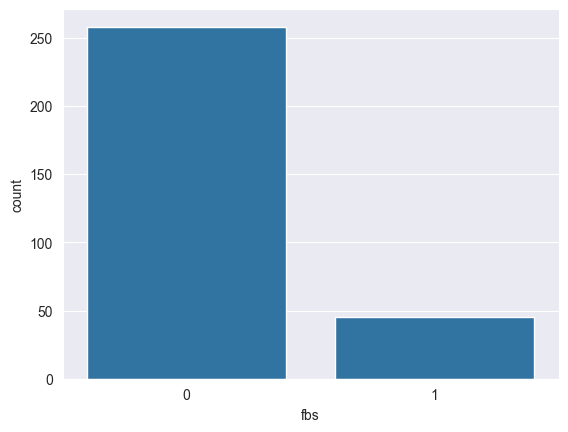

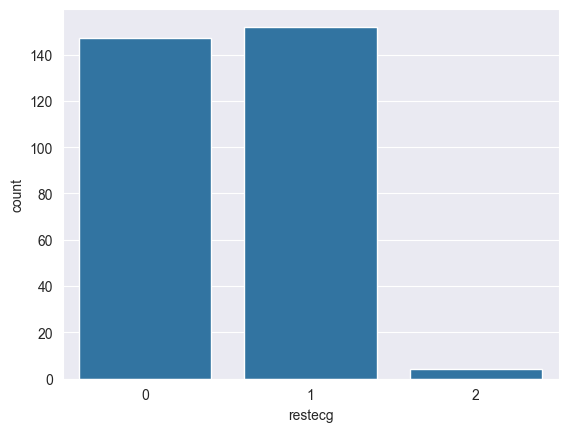

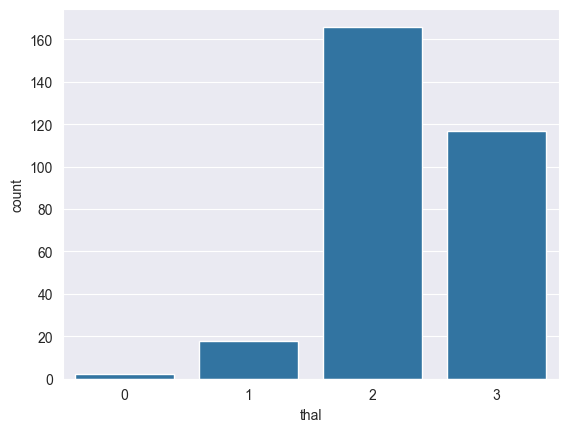

In [23]:
no_of_males = df["sex"].sum()
no_of_females = df["sex"].count() - no_of_males

cols = ['sex','cp','fbs','restecg','thal']

for col in cols:
    sns.countplot(x=col,data=df)
    plt.show()

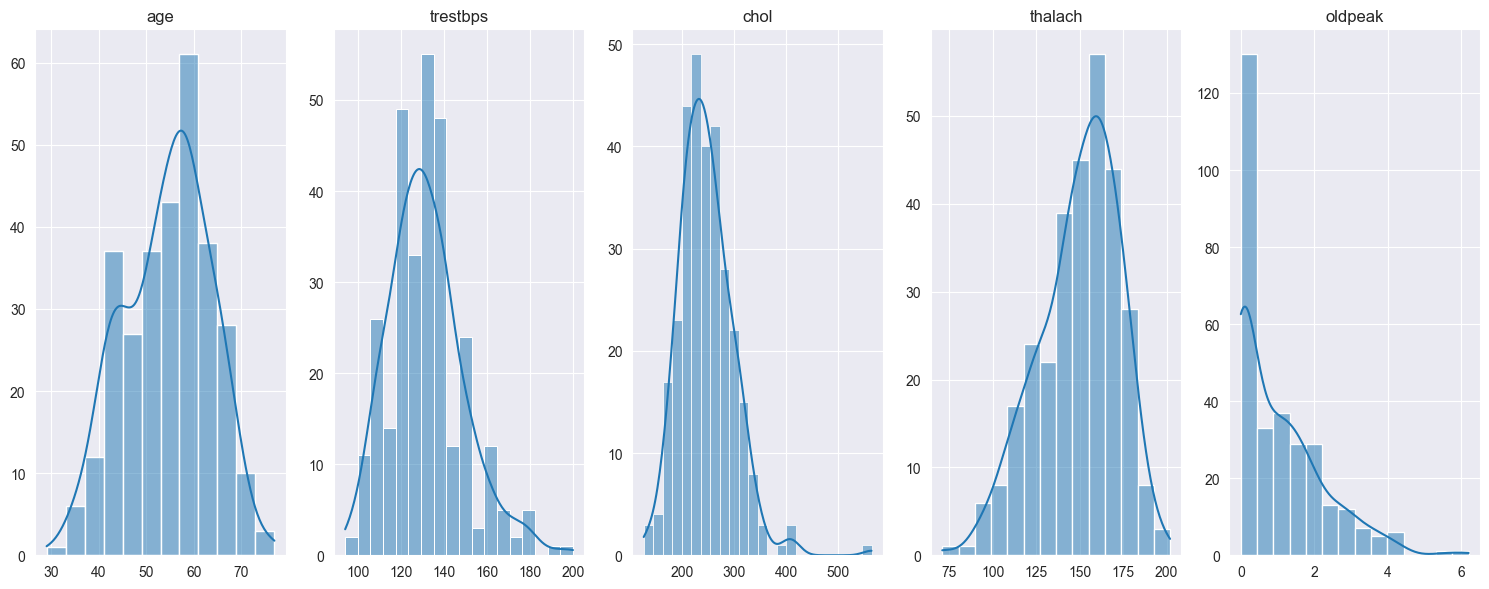

In [24]:
cats = [i for i in df.columns if  df[i].nunique() <= 5]
nums = [i for i in df.columns if i not in cats]

fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.histplot(df, x=j, kde=True, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()

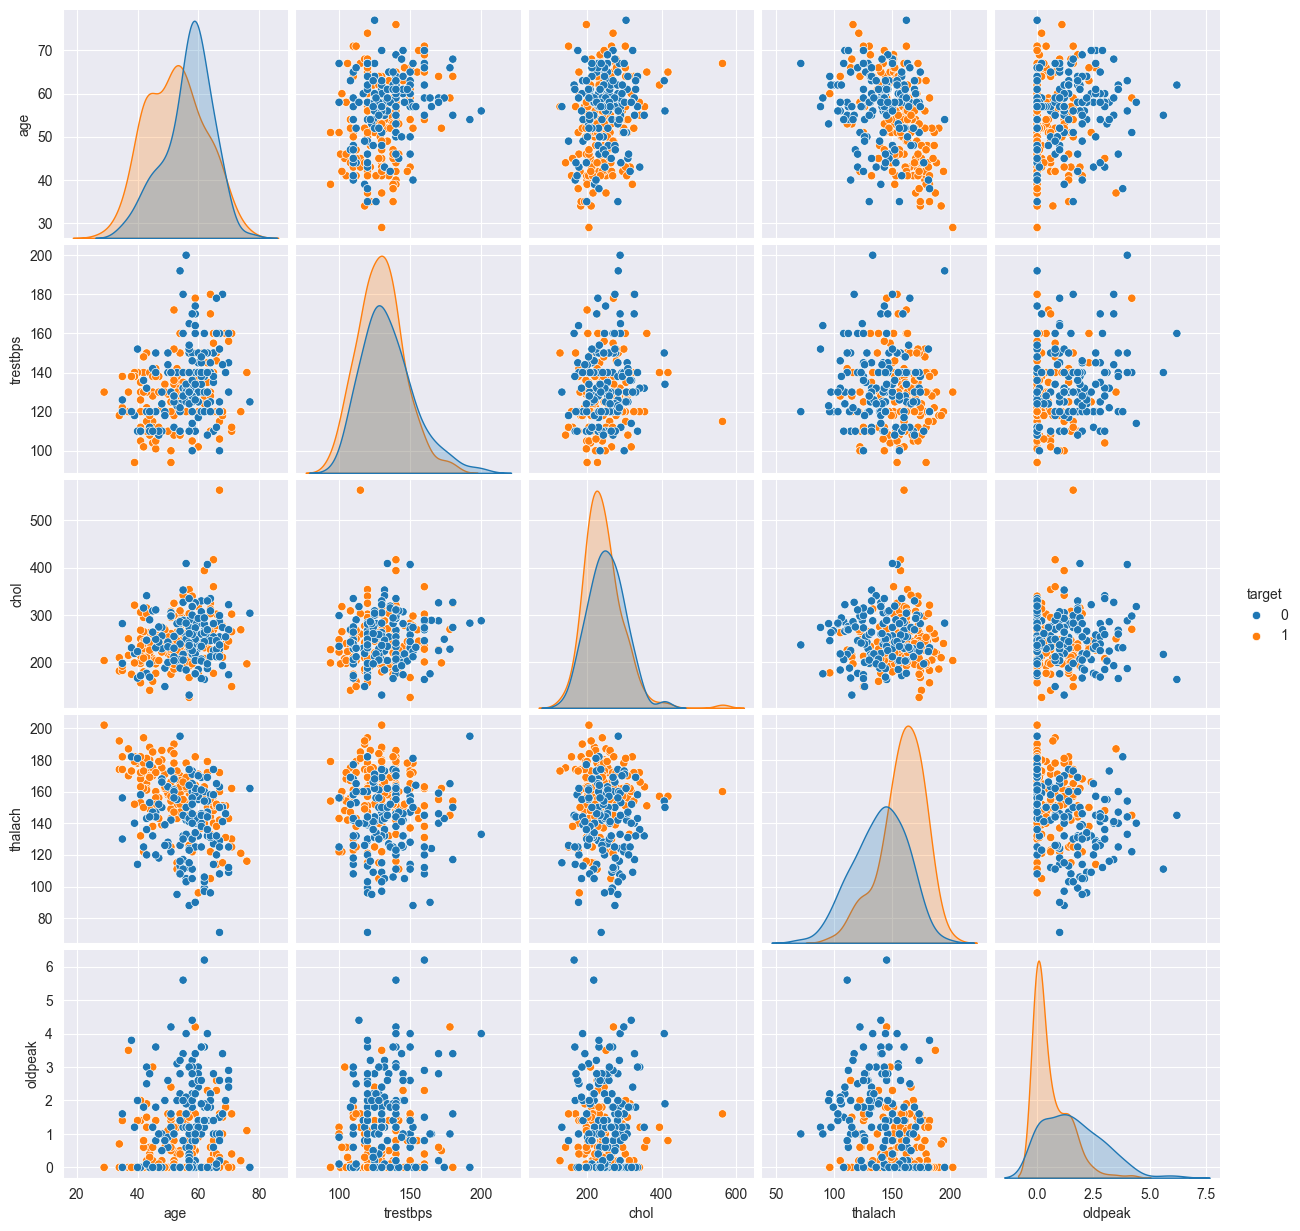

In [25]:
sns.pairplot(df, vars=nums, hue=cats[-1])
plt.show()

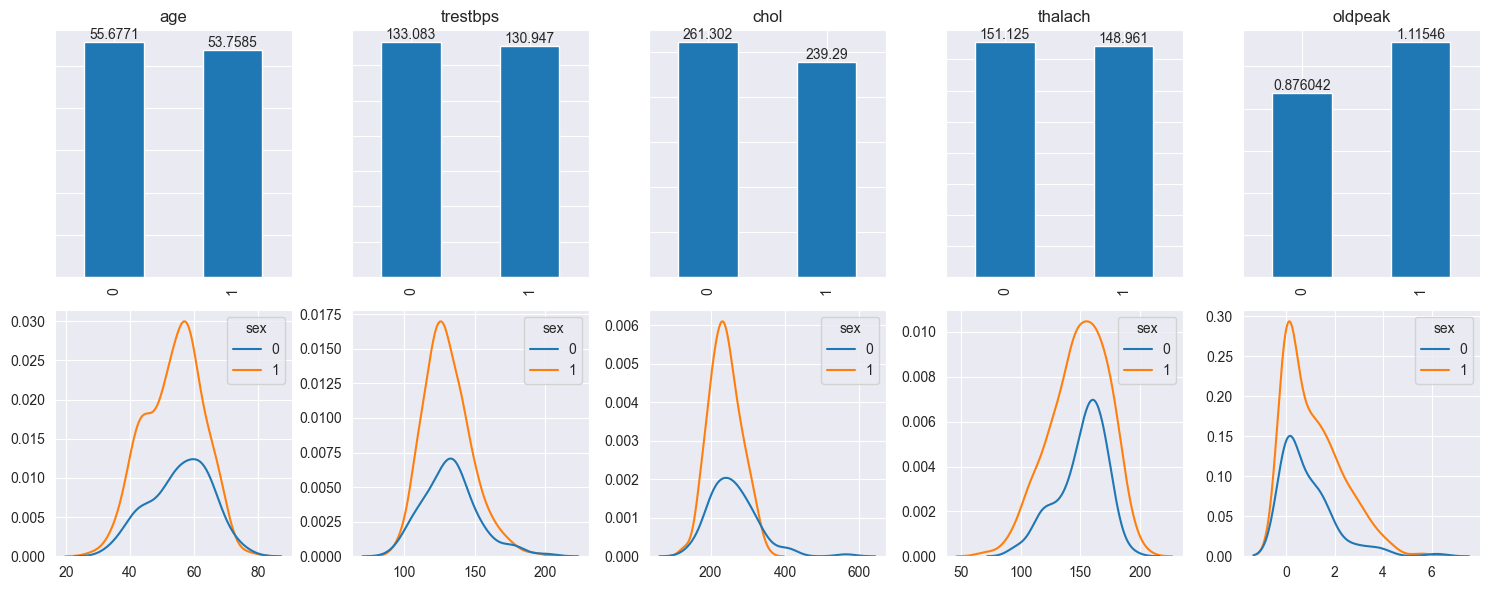

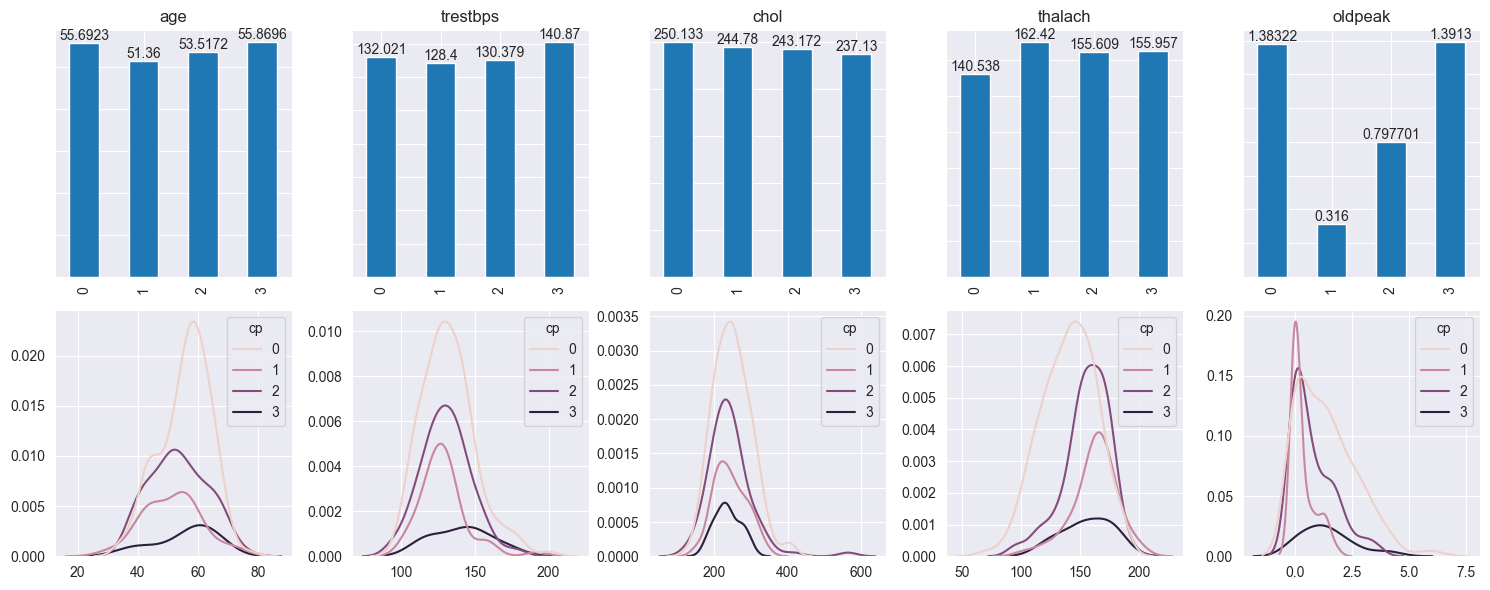

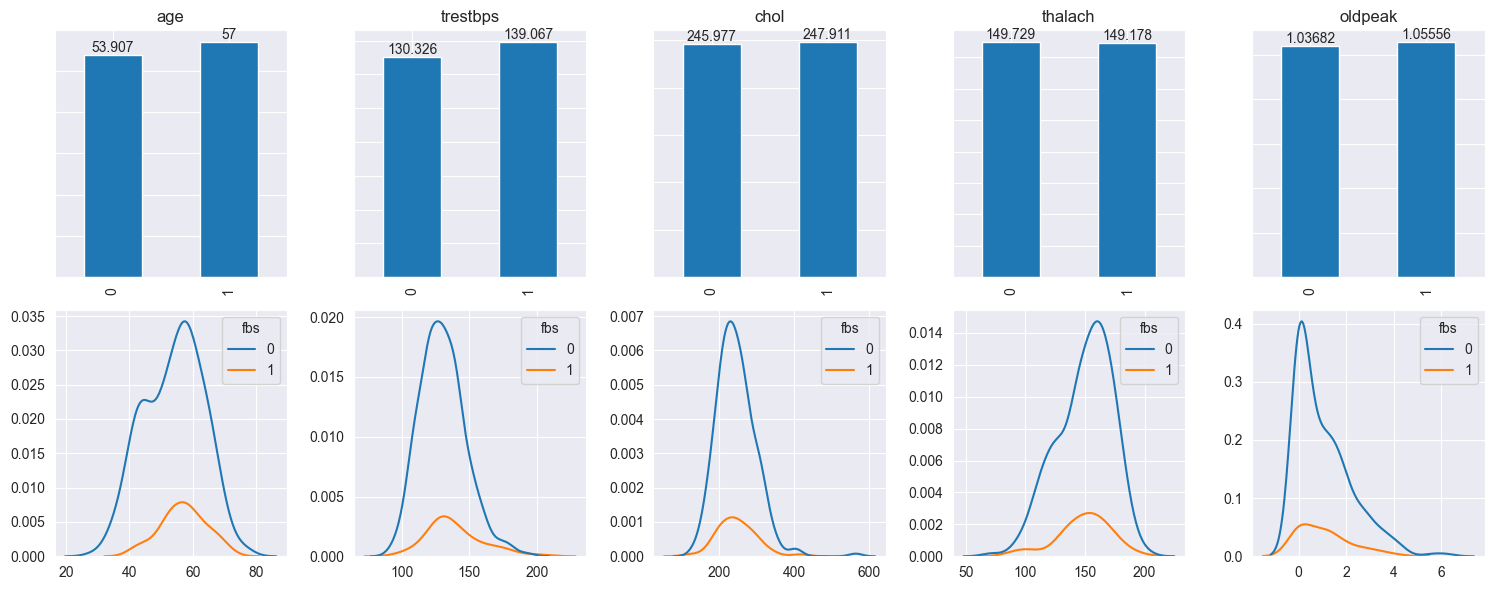

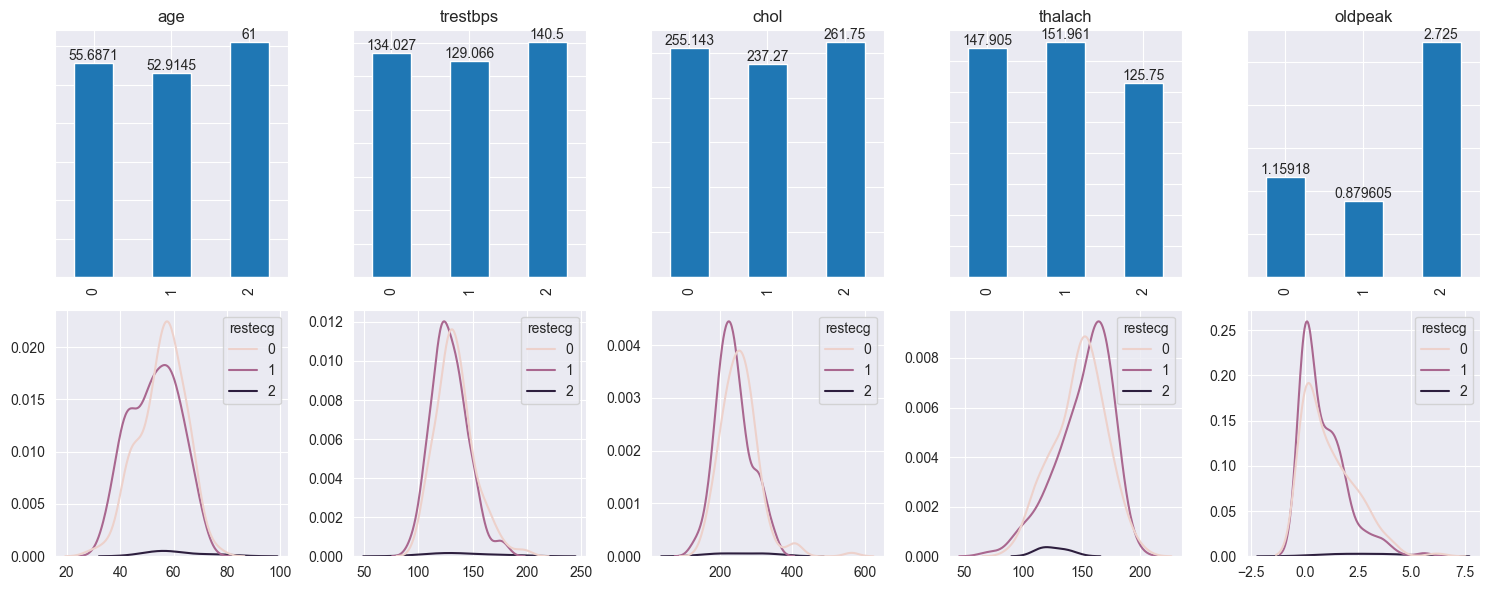

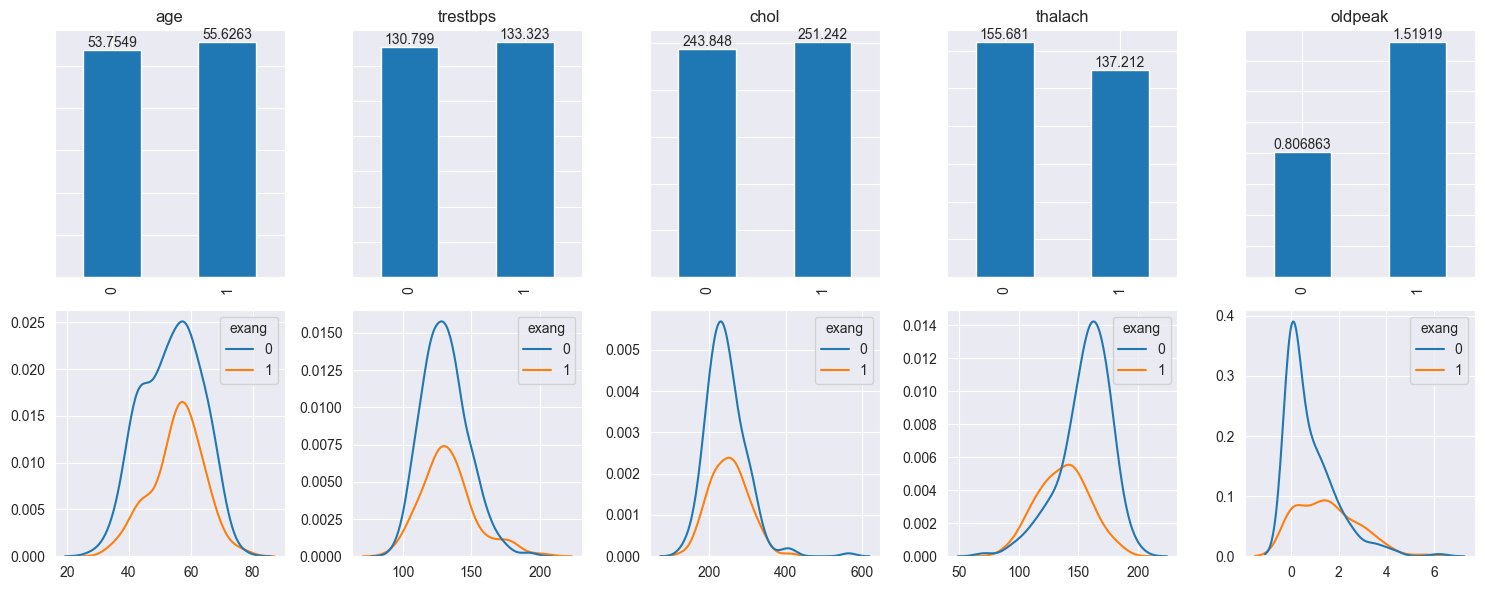

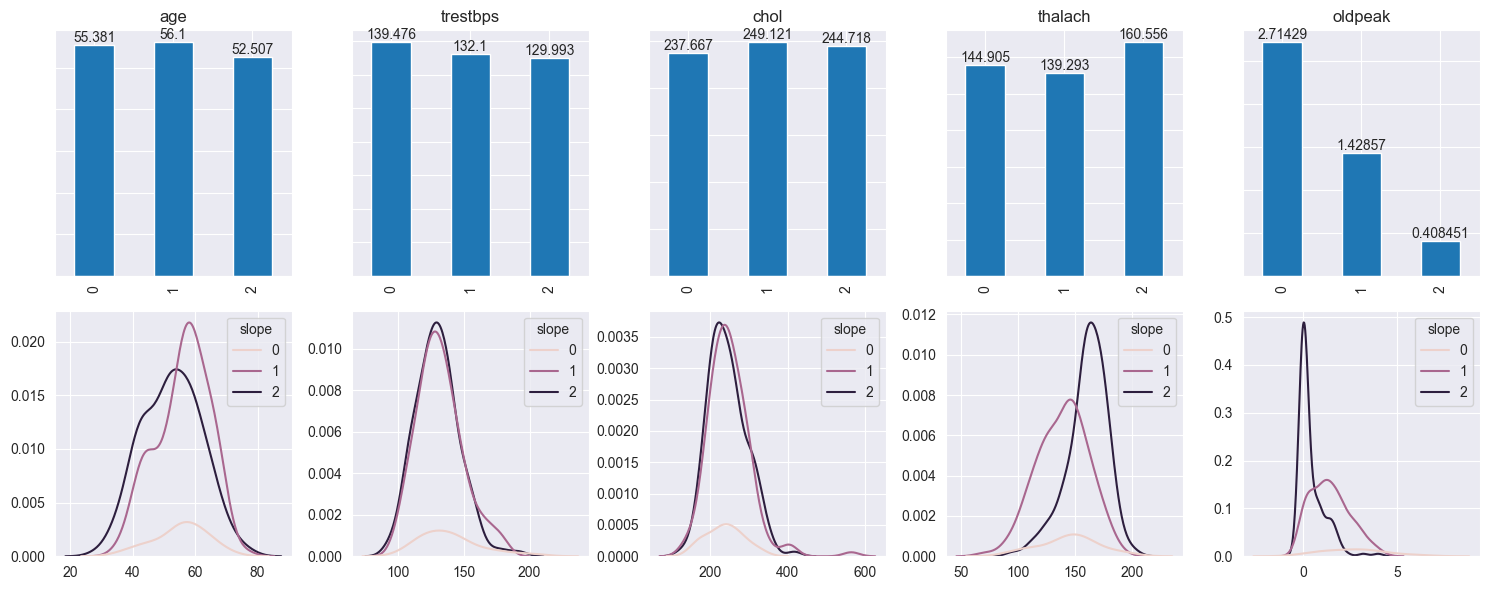

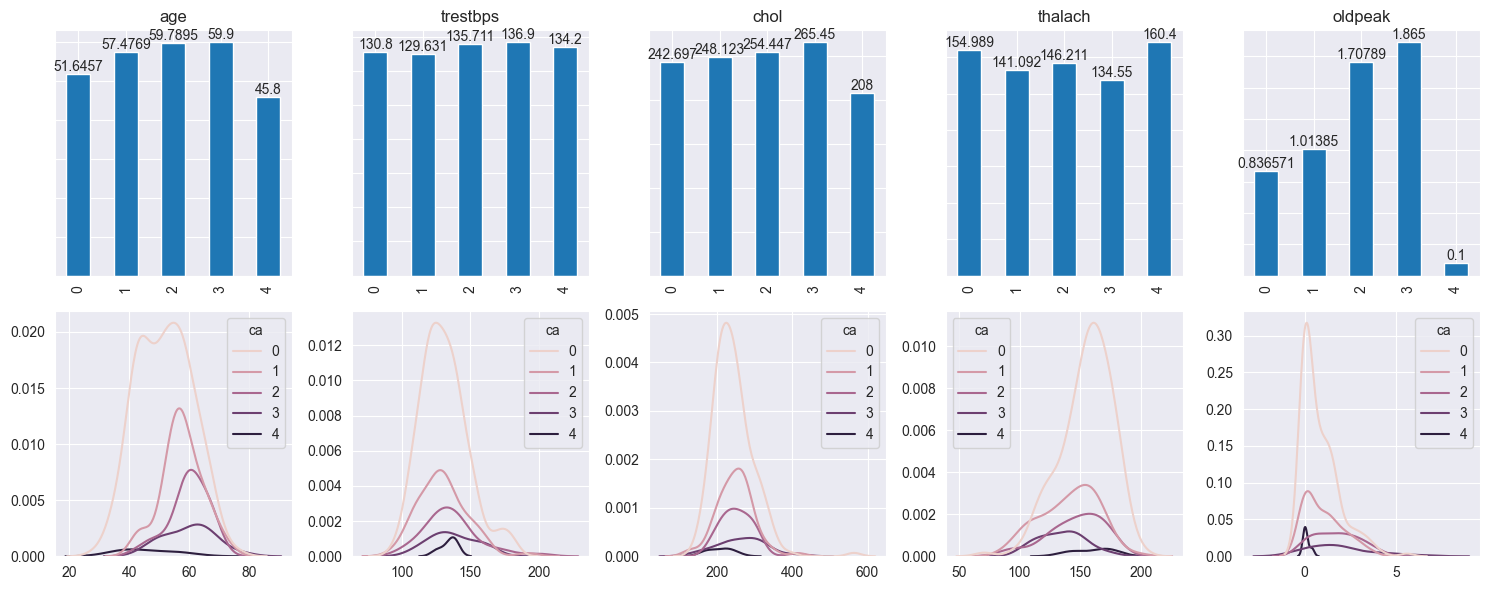

C:\Users\hasna\AppData\Local\Temp\ipykernel_15224\1247540800.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x=k, hue=i, ax=axes[index][j])


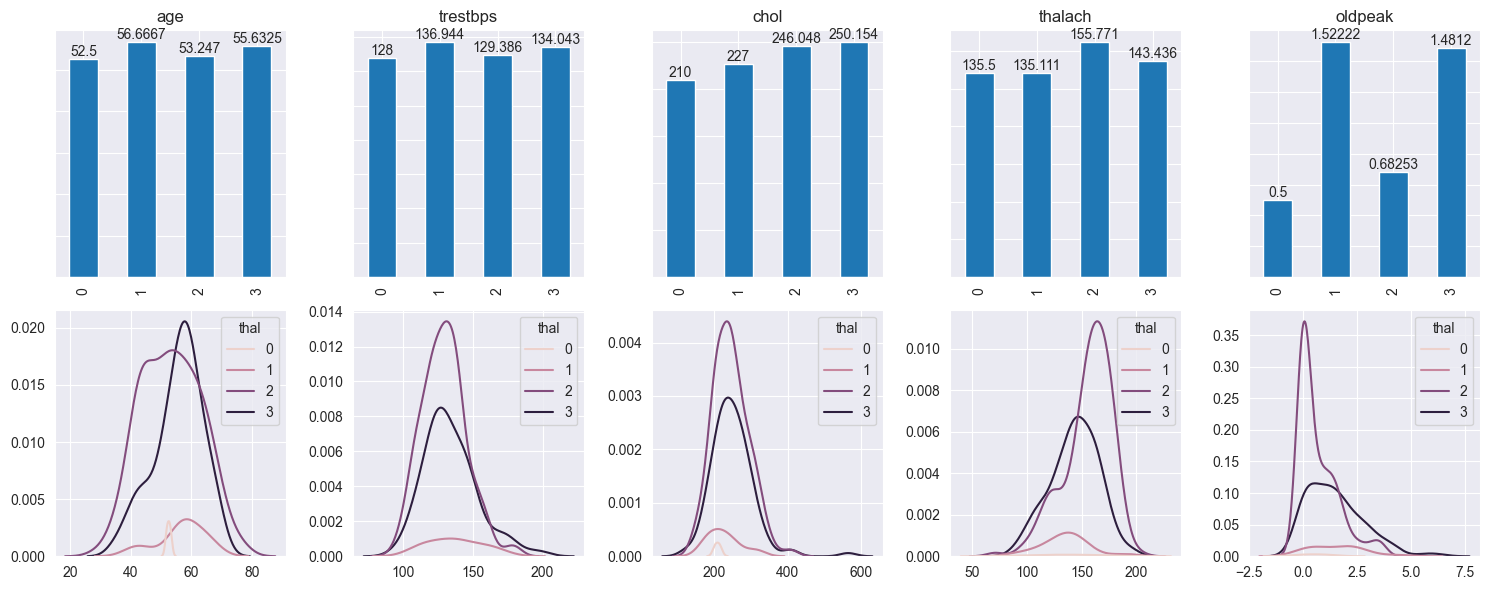

In [26]:
def bar_plots(axes):
    for container in axes.containers:
        axes.bar_label(container)
    axes.set_yticklabels(())
    axes.set_ylabel("")
    axes.set_xlabel("")

for i in cats[:-1]:
    display(HTML("<h2>Distribution for {}</h2>".format(i)))
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    grouped = df.groupby(i)
    for j, k in enumerate(nums):
        index = 0
        mean = grouped[k].mean()
        mean.plot(kind="bar", ax=axes[index][j])
        bar_plots(axes[index][j])
        axes[index][j].set_ylabel("")
        axes[index][j].set_xlabel("")
        axes[index][j].set_title(k)
        
        index += 1
        
        sns.kdeplot(df, x=k, hue=i, ax=axes[index][j])
        axes[index][j].set_ylabel("")
        axes[index][j].set_xlabel("")
        
    plt.tight_layout()
    plt.show()

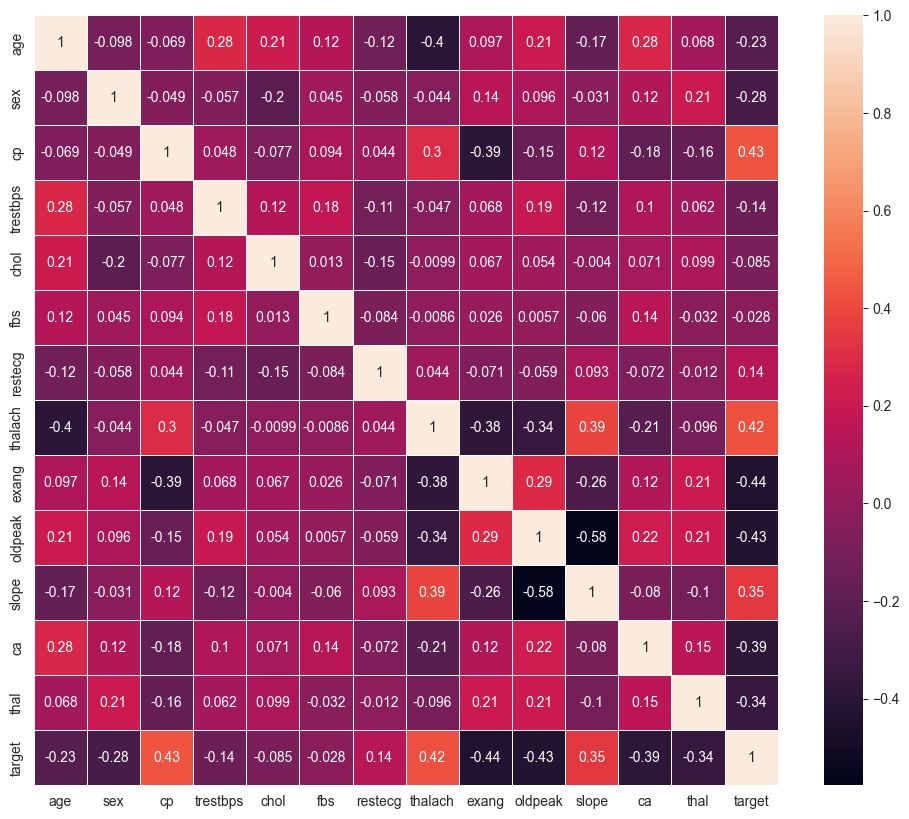

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop('target',axis=1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

Random Forest
F1 Score:  0.8615384615384615


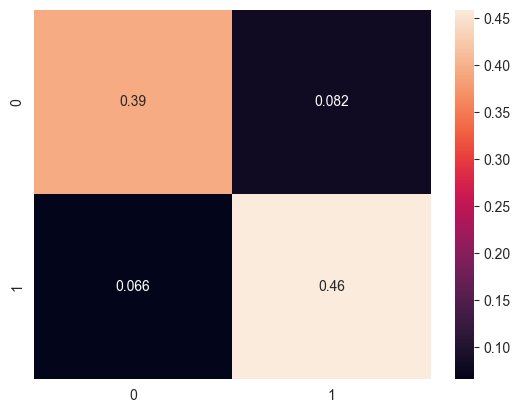

Logistic Regression
F1 Score:  0.8923076923076922


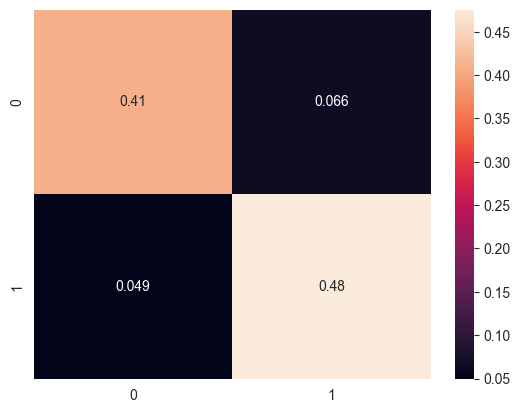

XGBoost
F1 Score:  0.8196721311475409


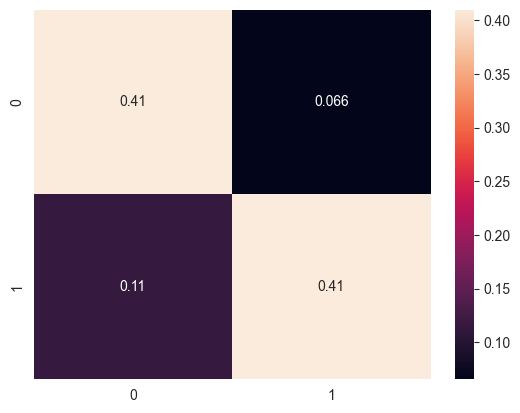

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')

models= {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost' : XGBClassifier()
}

for name,model in models.items():
    model.fit(X_train,Y_train)
    ypred = model.predict(X_test)
    print(name)
    print('F1 Score: ',f1_score(Y_test,ypred))
    sns.heatmap(confusion_matrix(Y_test,ypred)/np.sum(confusion_matrix(Y_test,ypred)),annot=True)
    plt.show()